In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm # color stuff
%matplotlib inline

    
def pltPrintPar():
    plt.rcParams.update({'font.size': 15})
    plt.rcParams['lines.linewidth'] = 2
    plt.rcParams['lines.markersize'] = 8

rootTP="/home/johann/Remote/imac"
rootTPtmp="/home/johann/Remote2"
rootMAC="/Users/jh"
root=rootMAC

In [6]:
def plotdataArr(dataArray,xlabel,lineArr,lineParam='',title='',linestyles='',setlog=''):
    # color stuff: http://stackoverflow.com/questions/4971269/how-to-pick-a-new-color-for-each-plotted-line-within-a-figure-in-matplotlib
    pltPrintPar()
    colors=cm.rainbow(np.linspace(0,1,len(dataArray)))
    if linestyles=='': lslist = len(dataArray) * ['o-']
    else: lslist = linestyles
    for i, line in enumerate(dataArray):
        ti = lineParam + ' = ' + str(lineArr[i])
        xs = line[:,0]
        dd0s = line[:,1]/6.
        plt.plot(xs,dd0s,lslist[i],label=ti,c=colors[i])
    plt.xlabel(r'$'+xlabel+'$')
    plt.ylabel(r'$D/D_0$')
    plt.ylim([0,1.3])
    plt.title(title)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
          ncol=3, fancybox=True, shadow=True)
    if setlog=='y' or setlog=="double":
        plt.yscale('log')
    if setlog=='x' or setlog=="double":
        plt.xscale('log')
    plt.show()
    
def plotdataArr(dataArray,xlabel,lineArr,lineParam='',title='',linestyles='',setlog='',legendloc='upper center'):
    # color stuff: http://stackoverflow.com/questions/4971269/how-to-pick-a-new-color-for-each-plotted-line-within-a-figure-in-matplotlib
    pltPrintPar()
    colors=cm.rainbow(np.linspace(0,1,len(dataArray)))
    if linestyles=='': lslist = len(dataArray) * ['o-']
    else: lslist = linestyles
    plt.figure(figsize=(7,5))
    for i, line in enumerate(dataArray):
        ti = lineParam + ' = ' + str(lineArr[i])
        xs = line[:,0]
        dd0s = line[:,1]/6.
        plt.plot(xs,dd0s,lslist[i],label=ti,c=colors[i])
    plt.xlabel(r'$'+xlabel+'$')
    plt.ylabel(r'$D/D_0$')
    plt.ylim([0,1.3])
    plt.title(title)
    plt.legend(loc=legendloc, bbox_to_anchor=(0.5, 1.2),
          ncol=3, fancybox=True, shadow=True)
    if setlog=='y' or setlog=="double":
        plt.yscale('log')
    if setlog=='x' or setlog=="double":
        plt.xscale('log')
    plt.show()
        
        

# Evaluate Single Sphere Simulations
## Import data for $D$ over $p$
### First import Stiff Network data
## ranSpheres no HI

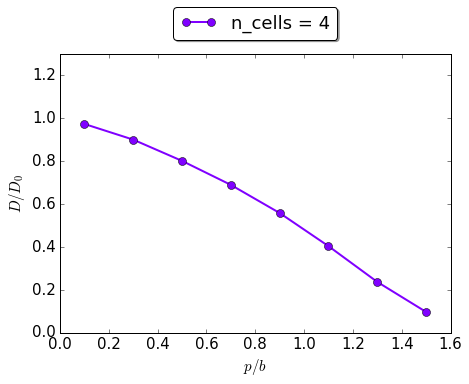

In [7]:
dataArr = []
ns = [4]
datadir= root + "/Documents/workspace-cpp/SPS/Release/sim_data/noreset/ranSpheres/test"
# Here, I can start loop, if I want to obtain numerous lines for different n or something
for n in ns:
    folder= datadir + '/EwaldTest1/n'+str(n)+'/noLub/steric/dt0.0005/t200/a0/d0/b40'
    data = []
    for pdir in os.listdir(folder):
        file=os.path.join(folder, pdir,'k1.000/u0/InstantValues/linear_fit_parametersMSD.txt')
        if os.path.isfile(file):
            p=file.split('/p')[1].split('/k')[0] # assign value from dir to p
            p='%g'%(float(p)/10)                 # make p value p/b
            with open(file, 'r') as fitf:
                m = (fitf.readline().split('m')[1]).split()[0]
            data.append([float(p),float(m)]) #the [:-1] serves to cut the linebreak '\n' from the string m.
    dataArr.append(sorted(data))

RSdata = (np.array(dataArr))
plotdataArr(RSdata,'p/b',lineArr=ns,lineParam='n_cells')

# trueRan no HI RELOAD BETTER DATA FROM SHELDON

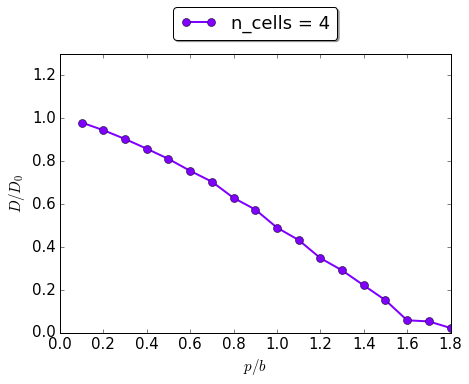

In [8]:
dataArr = []
ns = [4]
datadir= root + "/Documents/workspace-cpp/SPS/Release/sim_data/noreset/trueRan/test"
# Here, I can start loop, if I want to obtain numerous lines for different n or something
for n in ns:
    folder= datadir + '/EwaldTest1/n'+str(n)+'/noLub/steric/dt0.0005/t200/a0/d0/b40'
    data = []
    for pdir in os.listdir(folder):
        file=os.path.join(folder, pdir,'k1.000/u0/InstantValues/linear_fit_parametersMSD.txt')
        if os.path.isfile(file):
            p=file.split('/p')[1].split('/k')[0] # assign value from dir to p
            p='%g'%(float(p)/10)                 # make p value p/b
            with open(file, 'r') as fitf:
                m = (fitf.readline().split('m')[1]).split()[0]
            data.append([float(p),float(m)]) #the [:-1] serves to cut the linebreak '\n' from the string m.
    dataArr.append(sorted(data))

TRdata = (np.array(dataArr))
plotdataArr(TRdata,'p/b',lineArr=ns,lineParam='n_cells')

## SingleSpheres no HI

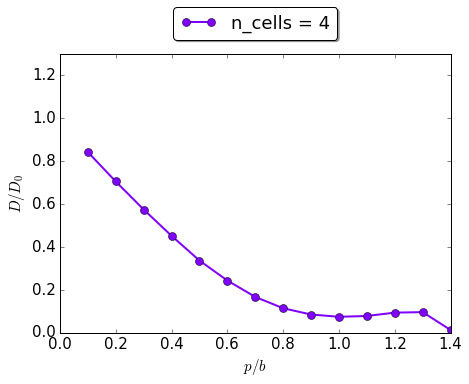

In [9]:
dataArr = []
dummy = [1]

datadir= root + "/Documents/workspace-cpp/SPS/Release/sim_data/noreset/test"
# Here, I can start loop, if I want to obtain numerous lines for different n or something
for d in dummy:
    folder= datadir + '/EwaldTest1/noLub/steric/dt0.0001/t200/a0/d0/b10'
    data = []
    for pdir in os.listdir(folder):
        file=os.path.join(folder, pdir,'k1.000/u0/InstantValues/linear_fit_parametersMSD.txt')
        if os.path.isfile(file):
            p=file.split('/p')[1].split('/k')[0] # assign value from dir to p
            p='%g'%(float(p)/10)                 # make p value p/b
            with open(file, 'r') as fitf:
                m = (fitf.readline().split('m')[1]).split()[0]
            data.append([float(p),float(m)]) #the [:-1] serves to cut the linebreak '\n' from the string m.
    dataArr.append(sorted(data))

SSdata = (np.array(dataArr))
plotdataArr(SSdata,r'p/b',lineArr=ns,lineParam='n_cells')

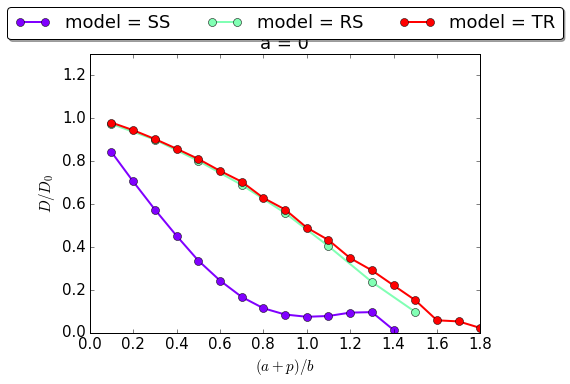

In [10]:
SSandRSdata = [SSdata[0],RSdata[0],TRdata[0]]
plotdataArr(SSandRSdata,r'(a+p)/b',lineArr=['SS','RS','TR'],lineParam='model',title='a = 0')

_______________
_______________
_______________

# Test randomness of sphere distribution
Looks good!

In [357]:
spheredata =  []
posfile = '/Users/jh/Documents/workspace-cpp/SPS/Release/sim_data/noreset/trueRan/test/EwaldTest1/n7/noLub/steric/dt0.0005/t111/a8/d0/b70/p1/k1.000/u0/Coordinates/single_traj.xyz'
with open(posfile, 'r') as f:
    for i, line in enumerate(f):
        if (i > 5) and line=="344\n":
            break
        spheredata.append(line.split()[1:])
spheredata = (np.asarray(spheredata[3:])).astype(float)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jh/Documents/workspace-cpp/SPS/Release/sim_data/noreset/trueRan/test/EwaldTest1/n7/noLub/steric/dt0.0005/t111/a8/d0/b70/p1/k1.000/u0/Coordinates/single_traj.xyz'

In [ ]:
print(len(spheredata[:].flatten()))
plt.hist(spheredata[:].flatten())
# TYPECAST TO FLOAT!

# FLEXIBLE
## Test different ks

In [32]:
def getData_Fixa(a,ksArr,n,dt):
    dt=str(dt)
    dataArr = []
    b=n*10
    datadir= root + "/Documents/workspace-cpp/Flexible/Release/sim_data/"
    #loop to recursively write plot commands to plot D over U_0  ----------------------------------------
    for i in range(len(ksArr)):
        ks = ksArr[i]
        folder= datadir + 'n_edge1/n_cells'+str(n)+'/dt'+dt+'/t200/kb0/ks' + str(ks) + '/a' + str(a) + '/b' + str(b) 
        data = []
        for pdir in os.listdir(folder):
            file=os.path.join(folder, pdir,'InstantValues/linear_fit_parametersMSD.txt')
            if os.path.isfile(file):
                p=file.split('/p')[1].split('/I')[0] # assign value from dir to p
                p='%g'%(float(p)/10)                 # make p value p/b
                with open(file, 'r') as fitf:
                    m = (fitf.readline().split('m')[1]).split()[0]
                data.append([float(p)+a/10.,float(m)]) #the [:-1] serves to cut the linebreak '\n' from the string m.
            #print(file)
        dataArr.append(np.array(sorted(data)))
    return dataArr

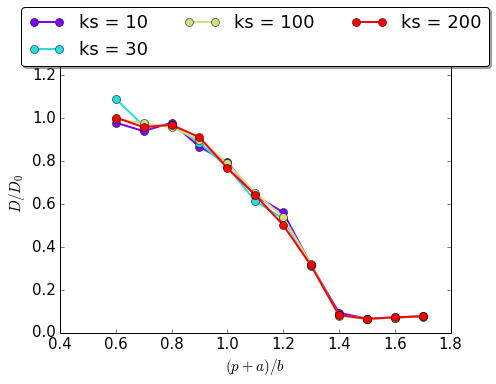

In [44]:
ksArrdt2 = [10,30,100,200]
a=5
n=3
dt=0.0002
Flexksdatdt2 = getData_Fixa(a,ksArrdt2,n,dt)
plotdataArr(Flexksdatdt2,r'(p+a)/b',lineArr=ksArrdt2,lineParam='ks')


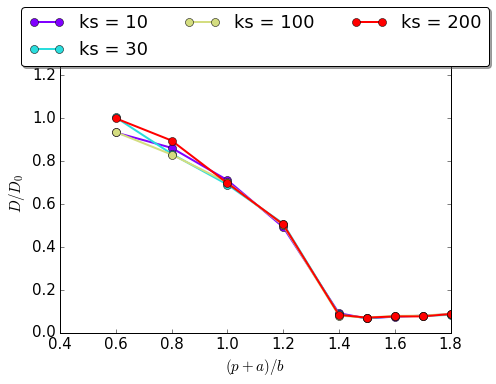

In [40]:
ksArr = [10,30,100,200]
a=5
n=3
dt=0.0001
Flexksdata = getData_Fixa(a,ksArr,n,dt)
plotdataArr(Flexksdata,r'(p+a)/b',lineArr=ksArr,lineParam='ks')


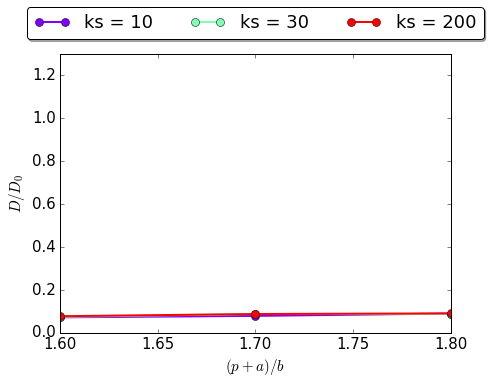

In [41]:
ksArrSmalldt = [10,30,200]
a=5
n=3
dt='5e-05'
FlexksSmalldt = getData_Fixa(a,ksArrSmalldt,n,dt)
plotdataArr(FlexksSmalldt,r'(p+a)/b',lineArr=ksArrSmalldt,lineParam='ks')

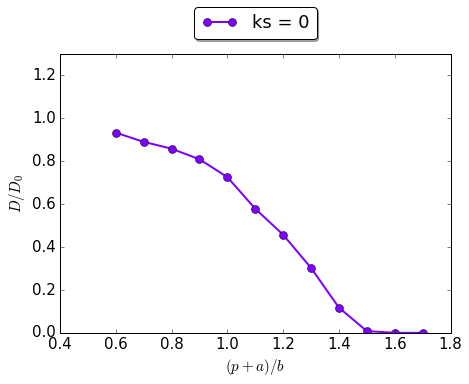

In [42]:
ks0Arr = [0]
a=5
n=1
dt=0.0002
Flexks0data = getData_Fixa(a,ks0Arr,n,dt)
plotdataArr(Flexks0data,r'(p+a)/b',lineArr=ks0Arr,lineParam='ks')


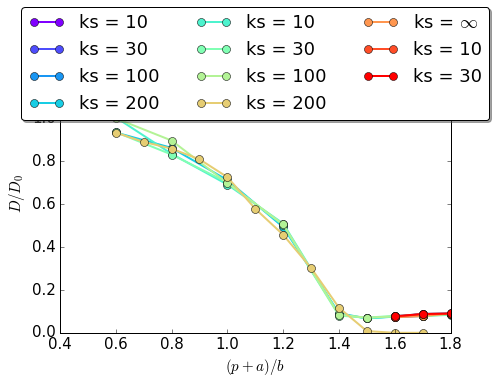

In [45]:
FlexksAndSS = [x for x in FlexksSmalldt] + [x for x in Flexksdata] + [y for y in Flexks0data] + [y for y in  FlexksSmalldt]
plotdataArr(FlexksAndSS,r'(p+a)/b',lineArr=ksArrdt2+ ksArr+[r'$\infty$']+ksArrSmalldt,lineParam='ks')

## Conclusion: 
I get the same result for large $(p+a)$ at all three different time steps. Hence, it must be due to some other thing. 
I will try a much larger system size. 

Simulations are running on yohsi

/Users/jh/Documents/Remote_PC/yoshi_scratch/Flexible/sim/Release/sim_data/n_edge1/n_cells6


## NOTE:
Also try larger timestep dt=0.0005. If I could run my simulations with this, that would be great.
I.e. dt0005n3a5varyks and dt0005n6a5varyks on yohsi

/Users/jh/Documents/Remote_PC/yoshi_scratch/Flexible/sim/Release/sim_data/n_edge1/n_cells6/dt0.0005

/Users/jh/Documents/Remote_PC/yoshi_scratch/Flexible/sim/Release/sim_data/n_edge1/n_cells3/dt0.0005

# Plot this together with ranPot and SS

## Read D over ks data

In [30]:
pArr = [7]
dataArr = []
a=7
n=3
b=n*10
datadir= root + "/Documents/workspace-cpp/Flexible/Release/sim_data/"
#loop to recursively write plot commands to plot D over U_0  ----------------------------------------
for p in pArr:
    folder= datadir + 'n_edge1/n_cells'+str(n)+'/dt0.0001/t200/kb0/'
    #ks' + str(ks) + '/a' + str(a) + '/b' + str(b) 
    data = []
    for kdir in os.listdir(folder):
        file=os.path.join(folder, kdir,'a'+str(a),'b'+str(b),'p'+str(p),'InstantValues/linear_fit_parametersMSD.txt')
        if os.path.isfile(file):
            ks=file.split('/ks')[1].split('/a')[0] # assign value from dir to ks
            with open(file, 'r') as fitf:
                m = (fitf.readline().split('m')[1]).split()[0]
            data.append([float(ks),float(m)]) #the [:-1] serves to cut the linebreak '\n' from the string m.
        #print(file)
    dataArr.append(sorted(data))
Flexpdatan2 = np.array(dataArr)

NameError: name 'Flexpdatan2dt0002' is not defined

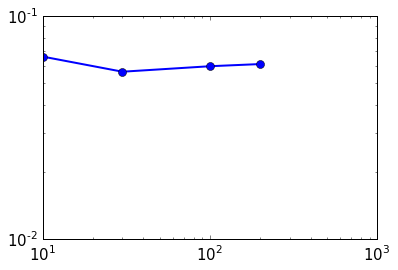

In [31]:
Flexpdatan2dt0001 = Flexpdatan2
plt.loglog(Flexpdatan2[0,:,0],Flexpdatan2[0,:,1]/6,'o-',label='dt=0.0001')
plt.loglog(Flexpdatan2dt0002[0,:,0],Flexpdatan2dt0002[0,:,1]/6,'o-')
plt.legend()
plt.xlabel(r'$k_{spring}$')
plt.ylabel(r'$D/D_0$')

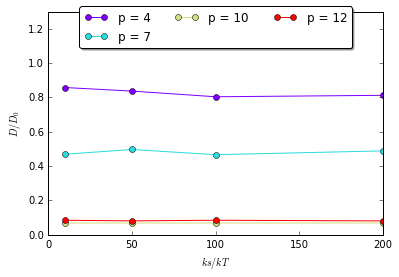

In [322]:
pArr = [4,7,10,12]
dataArr = []
a=5
n=3
b=n*10
datadir= root + "/Documents/workspace-cpp/Flexible/Release/sim_data/"
#loop to recursively write plot commands to plot D over U_0  ----------------------------------------
for p in pArr:
    folder= datadir + 'n_edge1/n_cells'+str(n)+'/dt0.0002/t200/kb0/'
    #ks' + str(ks) + '/a' + str(a) + '/b' + str(b) 
    data = []
    for kdir in os.listdir(folder):
        file=os.path.join(folder, kdir,'a'+str(a),'b'+str(b),'p'+str(p),'InstantValues/linear_fit_parametersMSD.txt')
        if os.path.isfile(file):
            ks=file.split('/ks')[1].split('/a')[0] # assign value from dir to ks
            with open(file, 'r') as fitf:
                m = (fitf.readline().split('m')[1]).split()[0]
            data.append([float(ks),float(m)]) #the [:-1] serves to cut the linebreak '\n' from the string m.
        #print(file)
    dataArr.append(sorted(data))
Flexpdatan3 = np.array(dataArr)
plotdataArr(Flexpdatan3,'ks/kT',lineArr=pArr,lineParam='p')

['o-', 'o-', 'o-', 'o-', 'o--', 'o--', 'o--', 'o--']


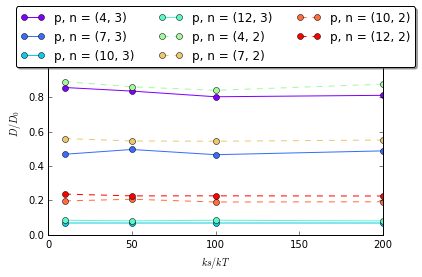

In [323]:
FlexpdataAlln = np.concatenate((Flexpdatan3, Flexpdatan2))
lineArr = [(4,3),(7,3),(10,3),(12,3),(4,2),(7,2),(10,2),(12,2)]
ls = ['o-'] * 4 + ['o--'] * 4
print(ls)
plotdataArr(FlexpdataAlln,'ks/kT',lineArr=lineArr,lineParam='p, n',linestyles=ls)
plt

_______________
_____________
______________
____________
# DEBUGGING



In [335]:
tracerdata = []
ks='200'
p='12'
posfile = '/Users/jh/Documents/workspace-cpp/Flexible/Release/sim_data/n_edge1/n_cells3/dt0.0002/t200/'
posfile += 'kb0/ks'+ks+'/a5/b30/p'+p+'/Coordinates/trajectory.txt'
with open(posfile, 'r') as f:
    for i, line in enumerate(f):
        lines = line.split()
        tracerdata.append(lines)
tracerdata = (np.asarray(tracerdata)).astype(float)

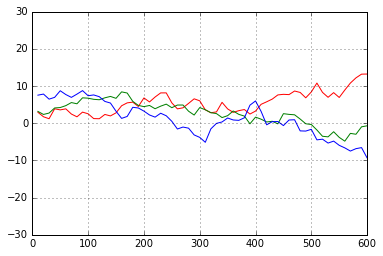

In [340]:
ts = tracerdata[:,0]
xs =  tracerdata[:,1]
ys =  tracerdata[:,2]
zs =  tracerdata[:,3]
plt.plot(ts,xs,'r-',ts,ys,'g-',ts,zs,'b-')
plt.xlim([0,600])
plt.ylim([-30,30])
plt.grid()


In [341]:
posfile = '/Users/jh/Documents/workspace-cpp/Flexible/Release/sim_data/n_edge1/n_cells3/dt0.0002/t200/kb0/ks200/a5/b30/p1/Coordinates/single_traj.xyz'
spheredat = []
with open(posfile, 'r') as f:
    next=0
    for i, lines in enumerate(f):
        line = lines.split()
        if next==1:
            spheredat.append(line[1:])
            next=0
        if line[0]=="O":
            next=1
spheredat = (np.asarray(spheredat)).astype(float)

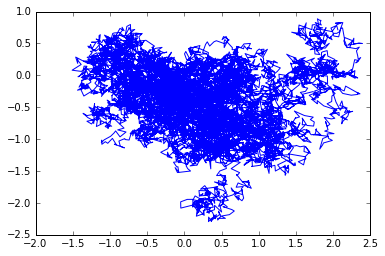

In [342]:
plt.plot(spheredat[:,0],spheredat[:,1])